In [18]:
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('/Volumes/Extreme SSD/IFT_output_2/df_all_withloc.csv', index_col=0)

In [20]:
xmin=5
xmax=300
data=df.area_km
fit = powerlaw.Fit(data,xmin=xmin,xmax=xmax)


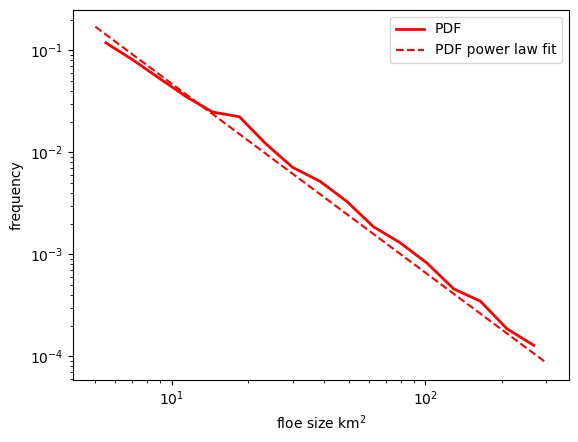

In [21]:
fig = fit.plot_pdf(color='r', linewidth=2)
fit.power_law.plot_pdf(color='r', ax=fig, linestyle='--')
plt.xlabel('floe size km$^2$')
plt.ylabel('frequency')
plt.legend(['PDF','PDF power law fit'])

# Evolution

In [26]:
slopes=[]
mean_area=[]
leng=[]

for a in np.arange(65,270,5):# 5 day mean sampled every 5 days
    results = powerlaw.Fit(df.area_km[(df.doy>=(a-2))&(df.doy<(a+2))],xmin=xmin,xmax=xmax)
    slopes=np.append(slopes,results.alpha)
    mean_area=np.append(mean_area,np.mean(df.area_km[(df.doy>=(a-2))&(df.doy<(a+2))]))
    leng=np.append(leng,len(df.circ[(df.doy>=(a-2))&(df.doy<(a+2))]))


In [27]:
results = powerlaw.Fit(df.area_km,xmin=xmin,xmax=xmax)
a_base=results.alpha

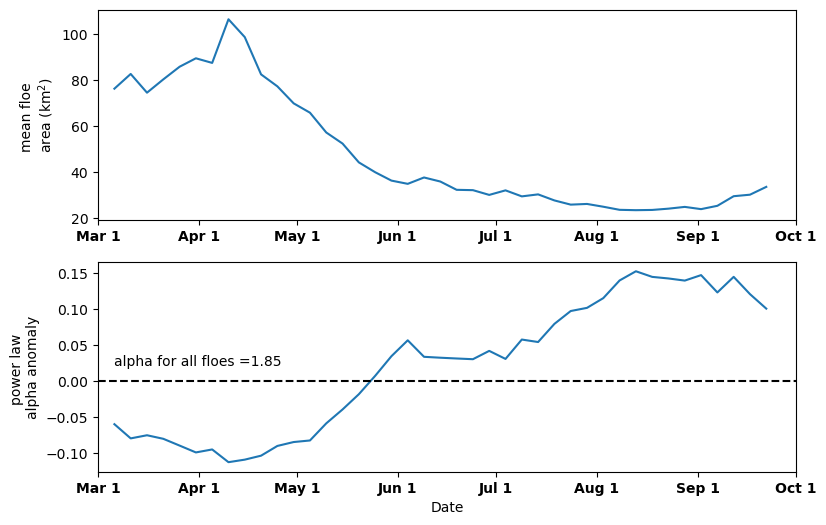

In [28]:
fig,ax=plt.subplots(2,1,figsize=(9,6))
x=np.arange(65,270,5)

ax[0].plot(x,mean_area)
ax[1].plot(x,slopes-a_base)
ax[1].text(65,0.021,'alpha for all floes ='+str(np.round(a_base,2)))


ax[1].axhline(0,c='k',linestyle='dashed');


for i in np.arange(0,2):
    ax[i].set_xlim(110,220)
    ax[i].set_xticks(ticks=[60,91,121,152,182,213,244,274],labels=['Mar 1','Apr 1','May 1','Jun 1','Jul 1','Aug 1','Sep 1','Oct 1'],fontweight='bold',fontsize=10);
ax[1].set_xlabel('Date')
ax[0].set_ylabel('mean floe \narea (km$^2$)')
ax[1].set_ylabel('power law \nalpha anomaly')

plt.savefig('/Users/ellenbuckley/Documents/Analysis/FSD/Evolution_sample.png')